In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = sns.load_dataset('tips')

In [90]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [92]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [93]:
data.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [94]:
data['sex'].value_counts() # only for categorical data

sex
Male      157
Female     87
Name: count, dtype: int64

In [95]:
data['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [96]:
data['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [97]:
data['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [98]:
X = data.drop('total_bill', axis=1)
y = data['total_bill']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [100]:
day_X = pd.get_dummies(X_train['day'])
X_train.drop('day', axis=1, inplace=True)
X_train = pd.concat([X_train, day_X], axis = 1)

In [101]:
sex_X = pd.get_dummies(X_train['sex'])
X_train.drop('sex', axis=1, inplace=True)
X_train = pd.concat([X_train, sex_X], axis = 1)

In [102]:
time_X = pd.get_dummies(X_train['time'])
X_train.drop('time', axis=1, inplace=True)
X_train = pd.concat([X_train, time_X], axis = 1)

In [103]:
smoker_X = pd.get_dummies(X_train['smoker'])
X_train.drop('smoker', axis=1, inplace=True)
X_train = pd.concat([X_train, smoker_X], axis = 1)

In [104]:
X_train

,tip,size,Thur,Fri,Sat,Sun,Male,Female,Lunch,Dinner,Yes,No
135,1.25,2,True,False,False,False,False,True,True,False,False,True
4,3.61,4,False,False,False,True,False,True,False,True,False,True
191,4.19,2,True,False,False,False,False,True,True,False,True,False
104,4.08,2,False,False,True,False,False,True,False,True,False,True
18,3.50,3,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
136,2.00,2,True,False,False,False,False,True,True,False,False,True
207,3.00,4,False,False,True,False,True,False,False,True,True,False
66,2.47,2,False,False,True,False,False,True,False,True,False,True
175,3.11,2,False,False,False,True,True,False,False,True,True,False


In [105]:
day_X = pd.get_dummies(X_test['day'])
X_test.drop('day', axis=1, inplace=True)
X_test = pd.concat([X_test, day_X], axis = 1)

In [106]:
sex_X = pd.get_dummies(X_test['sex'])
X_test.drop('sex', axis=1, inplace=True)
X_test = pd.concat([X_test, sex_X], axis = 1)

In [107]:
time_X = pd.get_dummies(X_test['time'])
X_test.drop('time', axis=1, inplace=True)
X_test = pd.concat([X_test, time_X], axis = 1)

In [108]:
smoker_X = pd.get_dummies(X_test['smoker'])
X_test.drop('smoker', axis=1, inplace=True)
X_test = pd.concat([X_test, smoker_X], axis = 1)

In [109]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


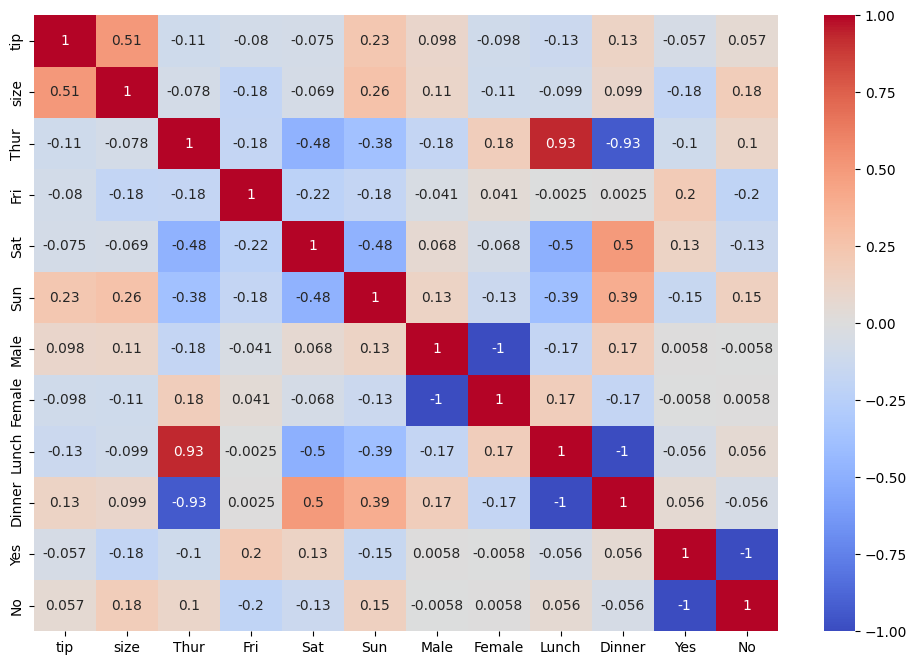

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=True)
plt.show()

In [111]:
y_pred = model.predict(X_test)

In [112]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)

In [113]:
rmse

6.2884008610623034